In [10]:
#importing the required  libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [11]:

# loading the dataset
collision_data = pd.read_csv('C:\\Users\\jathi\\Downloads\\Motor_Vehicle_Collisions_-_Crashes_20240204.csv', low_memory=False)


In [12]:
#making copies of datasets for different approaches
new_pds=collision_data
new_pds
sample=new_pds

# Data Cleaning

In [13]:
#Droping the columns which are not required for my analysis.
columns_to_drop = ["OFF STREET NAME", 
                   "CONTRIBUTING FACTOR VEHICLE 3", 
                   "CONTRIBUTING FACTOR VEHICLE 4",
                   "CONTRIBUTING FACTOR VEHICLE 5",
                   "VEHICLE TYPE CODE 3",
                   "VEHICLE TYPE CODE 4",
                   "VEHICLE TYPE CODE 5"]

new_pds.drop(columns=columns_to_drop, inplace=True)
new_pds

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062753,01/30/2024,0:00,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4699177,Station Wagon/Sport Utility Vehicle,Sedan
2062754,01/30/2024,22:30,BROOKLYN,11206,40.701450,-73.956480,"(40.70145, -73.95648)",NaN,NaN,1.0,...,0,0,0,1,0,Other Vehicular,Unspecified,4699269,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2062755,01/30/2024,15:30,QUEENS,11368,40.734863,-73.862656,"(40.734863, -73.862656)",NaN,NaN,0.0,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4699088,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2062756,01/27/2024,15:36,MANHATTAN,10034,40.872314,-73.912740,"(40.872314, -73.91274)",BROADWAY,WEST 220 STREET,0.0,...,0,0,0,0,0,Aggressive Driving/Road Rage,Unspecified,4699543,Sedan,Sedan


In [14]:
#location column has pair of latitudes and longitues and there are seperate columns of lattitude and longitude so dropping this column.
columns_to_drop = ["LOCATION"]
new_pds = new_pds.drop(columns=columns_to_drop)
new_pds

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,NaN,NaN,0.0,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062753,01/30/2024,0:00,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,0.0,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4699177,Station Wagon/Sport Utility Vehicle,Sedan
2062754,01/30/2024,22:30,BROOKLYN,11206,40.701450,-73.956480,NaN,NaN,1.0,0.0,...,0,0,0,1,0,Other Vehicular,Unspecified,4699269,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2062755,01/30/2024,15:30,QUEENS,11368,40.734863,-73.862656,NaN,NaN,0.0,0.0,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4699088,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2062756,01/27/2024,15:36,MANHATTAN,10034,40.872314,-73.912740,BROADWAY,WEST 220 STREET,0.0,0.0,...,0,0,0,0,0,Aggressive Driving/Road Rage,Unspecified,4699543,Sedan,Sedan


This code snippet in python fills null values in specified columns of a DataFrame by selecting random non-null values from unique combinations across those columns. It goes through each column, picks random non-null values from the dataset, and uses them to fill the nulls. This process improves data completeness without deleting any rows.

In [15]:
import random

# List of specific columns targeted for null replacement
target_columns = ["BOROUGH", "ZIP CODE", "LATITUDE", "LONGITUDE", "ON STREET NAME", "CROSS STREET NAME"]

# Isolating distinct, non-null value sets from the DataFrame for the target columns
distinct_non_null_sets = new_pds[target_columns].dropna().drop_duplicates()

# Function to select a random non-null set from the unique combinations
def choose_random_set():
    return distinct_non_null_sets.sample(n=1)

# Applying random non-null sets to fill in nulls across specified columns
for each_column in target_columns:
    chosen_set = choose_random_set()
    new_pds[each_column] = new_pds[each_column].fillna(chosen_set[each_column].values[0])


In [16]:
# Check null values in each column
null_values_per_column = new_pds.isnull().sum()

print("Null values in each column:")
print(null_values_per_column)


Null values in each column:
CRASH DATE                            0
CRASH TIME                            0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                              0
LONGITUDE                             0
ON STREET NAME                        0
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6700
CONTRIBUTING FACTOR VEHICLE 2    318678
COLLISION_ID                          0
VEHICLE TYPE CODE 1               13456
VEHICLE TYPE CODE 2              392318
dtype: int64


This code calculates the mode for particular columns concerning incident contributing factors and vehicle types. It then replaces missing values with these modes to ensure the dataset's completeness, using a methodical approach to enhance its reliability for subsequent analysis.

In [17]:
# Function to exclude "Unspecified" values and compute the mode for a given column
def compute_mode(dataframe, column_name):
    mode_value = dataframe[dataframe[column_name] != "Unspecified"][column_name].mode().iloc[0]
    return mode_value

# Compute mode for CONTRIBUTING FACTOR VEHICLE 1 and CONTRIBUTING FACTOR VEHICLE 2
factor_1_mode = compute_mode(new_pds, "CONTRIBUTING FACTOR VEHICLE 1")
factor_2_mode = compute_mode(new_pds, "CONTRIBUTING FACTOR VEHICLE 2")

# Calculate the mode for vehicle type codes without excluding any specific value
vehicle_1_mode = new_pds["VEHICLE TYPE CODE 1"].mode().iloc[0]
vehicle_2_mode = new_pds["VEHICLE TYPE CODE 2"].mode().iloc[0]

# Fill null values with mode values
new_pds["CONTRIBUTING FACTOR VEHICLE 1"].fillna(factor_1_mode, inplace=True)
new_pds["CONTRIBUTING FACTOR VEHICLE 2"].fillna(factor_2_mode, inplace=True)
new_pds["VEHICLE TYPE CODE 1"].fillna(vehicle_1_mode, inplace=True)
new_pds["VEHICLE TYPE CODE 2"].fillna(vehicle_2_mode, inplace=True)

# Filter rows with "Unspecified" in CONTRIBUTING FACTOR VEHICLE 1 and CONTRIBUTING FACTOR VEHICLE 2
new_pds = new_pds[(new_pds["CONTRIBUTING FACTOR VEHICLE 1"] != "Unspecified") & (new_pds["CONTRIBUTING FACTOR VEHICLE 2"] != "Unspecified")]


In [18]:
# Check null values in each column
null_values_per_column = new_pds.isnull().sum()

print("Null values in each column:")
print(null_values_per_column)


Null values in each column:
CRASH DATE                        0
CRASH TIME                        0
BOROUGH                           0
ZIP CODE                          0
LATITUDE                          0
LONGITUDE                         0
ON STREET NAME                    0
CROSS STREET NAME                 0
NUMBER OF PERSONS INJURED         5
NUMBER OF PERSONS KILLED         14
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
CONTRIBUTING FACTOR VEHICLE 1     0
CONTRIBUTING FACTOR VEHICLE 2     0
COLLISION_ID                      0
VEHICLE TYPE CODE 1               0
VEHICLE TYPE CODE 2               0
dtype: int64


In [10]:
#dropping the null values and making dataset ready for analksis
new_pds = new_pds.dropna()

In [19]:
# Check null values in each column
null_values_per_column = new_pds.isnull().sum()

print("Null values in each column:")
print(null_values_per_column)

Null values in each column:
CRASH DATE                        0
CRASH TIME                        0
BOROUGH                           0
ZIP CODE                          0
LATITUDE                          0
LONGITUDE                         0
ON STREET NAME                    0
CROSS STREET NAME                 0
NUMBER OF PERSONS INJURED         5
NUMBER OF PERSONS KILLED         14
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
CONTRIBUTING FACTOR VEHICLE 1     0
CONTRIBUTING FACTOR VEHICLE 2     0
COLLISION_ID                      0
VEHICLE TYPE CODE 1               0
VEHICLE TYPE CODE 2               0
dtype: int64


In [20]:
# Convert the 'CRASH DATE' column to a date format of MM/dd/yyyy
new_pds['formatted_date'] = pd.to_datetime(new_pds['CRASH DATE'], format='%m/%d/%Y')

# Display the resulting DataFrame with the formatted date column
print(new_pds)

         CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
1        03/26/2022      11:45  BROOKLYN    11435  40.616353 -73.909775   
4        12/14/2021       8:13  BROOKLYN    11233  40.683304 -73.917274   
13       12/14/2021       0:59  BROOKLYN    11435  40.596620 -74.002310   
16       12/14/2021      20:03  BROOKLYN    11226  40.650680 -73.958810   
21       12/14/2021       5:46  BROOKLYN    11435  40.744644 -73.770410   
...             ...        ...       ...      ...        ...        ...   
2062721  01/30/2024       7:05  BROOKLYN    11435  40.640750 -74.170425   
2062723  01/30/2024      20:19  BROOKLYN    11435  40.607190 -74.162430   
2062724  01/30/2024      18:50    QUEENS    11104  40.744790 -73.917430   
2062748  01/26/2024      19:36  BROOKLYN    11435  40.742836 -73.972140   
2062749  01/30/2024      17:58    QUEENS    11420  40.670876 -73.822740   

                           ON STREET NAME  CROSS STREET NAME  \
1                 QUEENSBORO BRIDGE

C:\Users\jathi\AppData\Local\Temp\ipykernel_16284\1353538911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pds['formatted_date'] = pd.to_datetime(new_pds['CRASH DATE'], format='%m/%d/%Y')


In [21]:
# Drop the 'CRASH DATE' column
new_pds_dropped = new_pds.drop(columns=["CRASH DATE"])

# Rename the 'formatted_date' column to 'CRASH DATE'
new_pds_dropped.rename(columns={"formatted_date": "CRASH DATE"}, inplace=True)

# Split the 'CRASH TIME' string and select the hour part
new_pds["CRASH TIME"] = new_pds["CRASH TIME"].str.split(":").str[0]

# Convert the 'CRASH TIME' column to integer type
new_pds["CRASH TIME"] = new_pds["CRASH TIME"].astype(int)

# Display the DataFrame
print(new_pds)


         CRASH DATE  CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
1        03/26/2022          11  BROOKLYN    11435  40.616353 -73.909775   
4        12/14/2021           8  BROOKLYN    11233  40.683304 -73.917274   
13       12/14/2021           0  BROOKLYN    11435  40.596620 -74.002310   
16       12/14/2021          20  BROOKLYN    11226  40.650680 -73.958810   
21       12/14/2021           5  BROOKLYN    11435  40.744644 -73.770410   
...             ...         ...       ...      ...        ...        ...   
2062721  01/30/2024           7  BROOKLYN    11435  40.640750 -74.170425   
2062723  01/30/2024          20  BROOKLYN    11435  40.607190 -74.162430   
2062724  01/30/2024          18    QUEENS    11104  40.744790 -73.917430   
2062748  01/26/2024          19  BROOKLYN    11435  40.742836 -73.972140   
2062749  01/30/2024          17    QUEENS    11420  40.670876 -73.822740   

                           ON STREET NAME  CROSS STREET NAME  \
1                 QUEEN

C:\Users\jathi\AppData\Local\Temp\ipykernel_16284\1140766003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pds["CRASH TIME"] = new_pds["CRASH TIME"].str.split(":").str[0]
C:\Users\jathi\AppData\Local\Temp\ipykernel_16284\1140766003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pds["CRASH TIME"] = new_pds["CRASH TIME"].astype(int)


# Exploratory Data Analysis[EDA]

      ZIP CODE                  VEHICLE TYPE CODE 1  \
29132    11435                                Sedan   
29314    11435  Station Wagon/Sport Utility Vehicle   
29318    11435  Station Wagon/Sport Utility Vehicle   
29137    11435                                Sedan   
28843    11435                    PASSENGER VEHICLE   
28847    11435                    PASSENGER VEHICLE   

                       VEHICLE TYPE CODE 2  count  
29132                                Sedan  33054  
29314                                Sedan  20135  
29318  Station Wagon/Sport Utility Vehicle   9620  
29137  Station Wagon/Sport Utility Vehicle   9063  
28843                    PASSENGER VEHICLE   8907  
28847                                Sedan   5036  


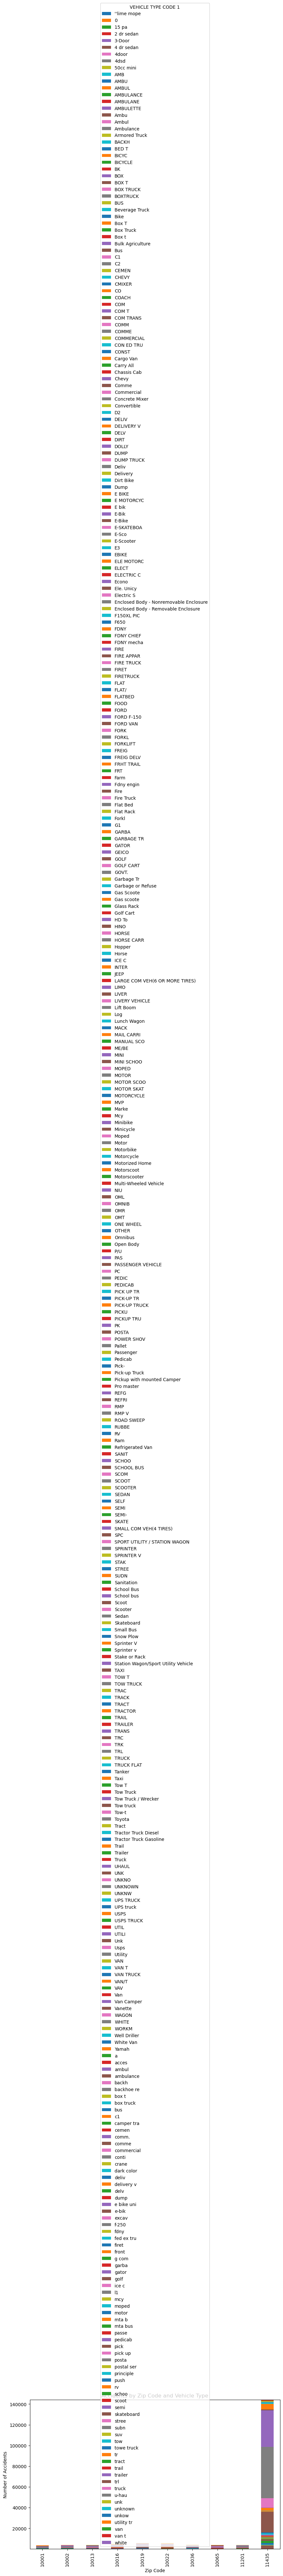

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by ZIP CODE, VEHICLE TYPE CODE 1, and VEHICLE TYPE CODE 2, then count occurrences and sort
zip_vehicle_accidents = new_pds.groupby(["ZIP CODE", "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2"]).size().reset_index(name="count").sort_values(by="count", ascending=False)

# Display the top 6 rows
print(zip_vehicle_accidents.head(6))

# Filter to only show top 10 zip codes with the highest number of accidents
top_zipcodes = zip_vehicle_accidents.groupby("ZIP CODE")["count"].sum().nlargest(10).index
top_zipcodes_df = zip_vehicle_accidents[zip_vehicle_accidents["ZIP CODE"].isin(top_zipcodes)]

# Pivot the DataFrame to show the count of accidents for each vehicle type combination for each zip code
pivoted_df = top_zipcodes_df.pivot_table(index="ZIP CODE", columns="VEHICLE TYPE CODE 1", values="count", aggfunc="sum").fillna(0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
pivoted_df.plot(kind="bar", stacked=True, ax=ax)
ax.set_title("Accidents by Zip Code and Vehicle Type")
ax.set_xlabel("Zip Code")
ax.set_ylabel("Number of Accidents")
plt.show()



         BOROUGH   count
1       BROOKLYN  214069
2      MANHATTAN   86280
3         QUEENS   65779
0          BRONX   41600
4  STATEN ISLAND    9898


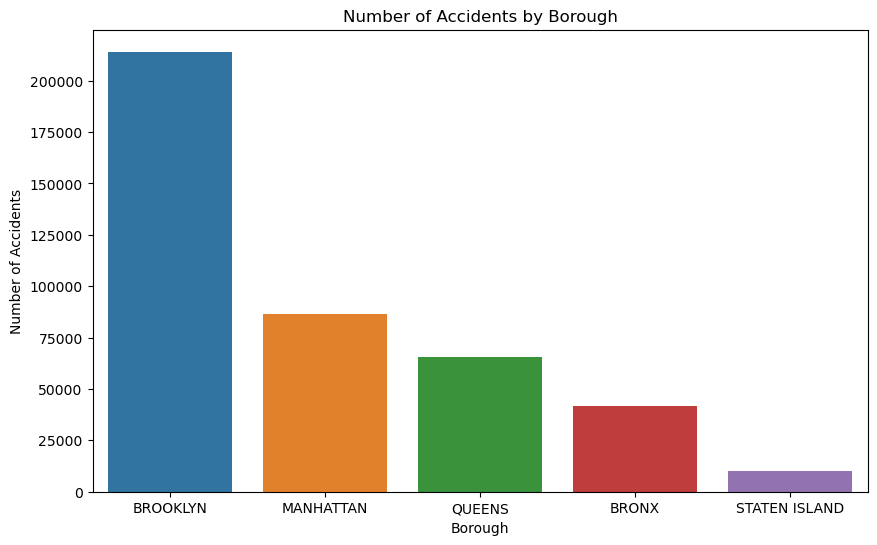

In [15]:
# Group by BOROUGH and count occurrences, then sort
borough_accidents = new_pds.groupby("BOROUGH").size().reset_index(name="count").sort_values(by="count", ascending=False)

# Display the top 5 rows
print(borough_accidents.head(5))

# Create a seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="BOROUGH", y="count", data=borough_accidents)
plt.xlabel("Borough")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Borough")
plt.show()

The dataset presents the frequency of vehicle collisions across the boroughs of New York City, with Brooklyn registering the highest number, trailed by manhattan, Queens, the Bronx, and Staten Island. This pattern implies that drivers in brookyln might face a higher risk of accidents, likely influenced by factors such as dense population, heavy traffic, and intricate road layouts. Conversely, the comparatively lower collision rate in Staten Island could be linked to its lower population density and less congested road networks.

    CRASH TIME  count
0            0  14618
1            1   8001
2            2   6307
3            3   5738
4            4   6419
5            5   7026
6            6  10424
7            7  13010
8            8  21889
9            9  20717
10          10  19311
11          11  20245
12          12  21283
13          13  22765
14          14  26202
15          15  25408
16          16  29090
17          17  29077
18          18  26342
19          19  22081
20          20  18758
21          21  16048
22          22  14465
23          23  12417


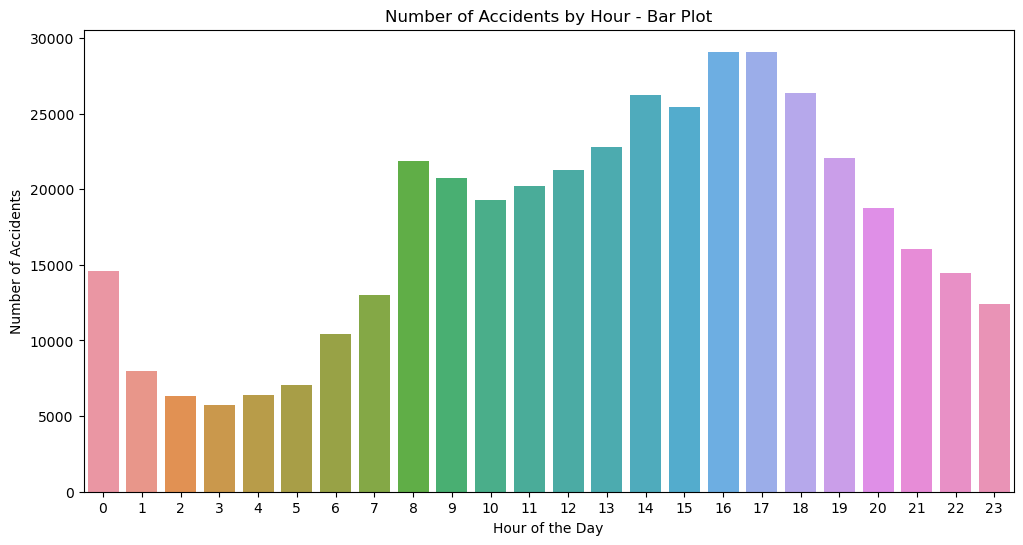

In [24]:
# Group by CRASH TIME and count occurrences, then sort
hourly_accidents = new_pds.groupby("CRASH TIME").size().reset_index(name="count").sort_values(by="CRASH TIME")

# Display the top 24 rows
print(hourly_accidents.head(24))

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="CRASH TIME", y="count", data=hourly_accidents)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Hour - Bar Plot")
plt.show()

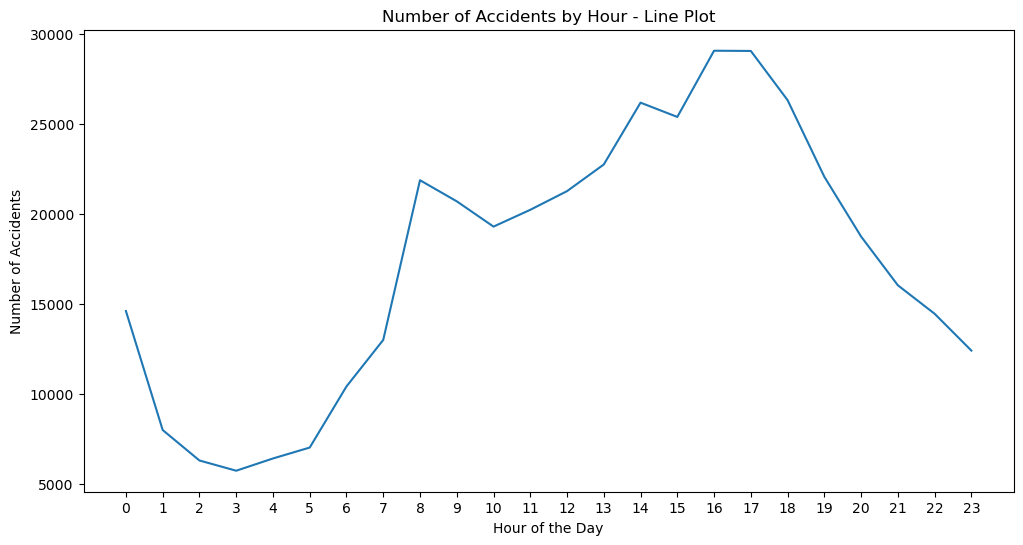

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="CRASH TIME", y="count", data=hourly_accidents)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Hour - Line Plot")
plt.xticks(range(0, 24))
plt.show()


The data shows that the most collisions occur during the late afternoon and evening rush hours, peaking between 4 PM and 7 PM. Collisions are less frequent in the early morning hours and slightly increase during late night, suggesting patterns in traffic flow and possible driver tiredness.

    ZIP CODE   count
222    11435  144088
18     10019    5831
21     10022    5743
15     10016    5119
35     10036    4133
3      10002    3978
45     10065    3889
13     10013    3817
136    11201    3756
2      10001    3604
141    11207    3405
16     10017    3230
129    11101    3140
145    11211    2977
219    11432    2913


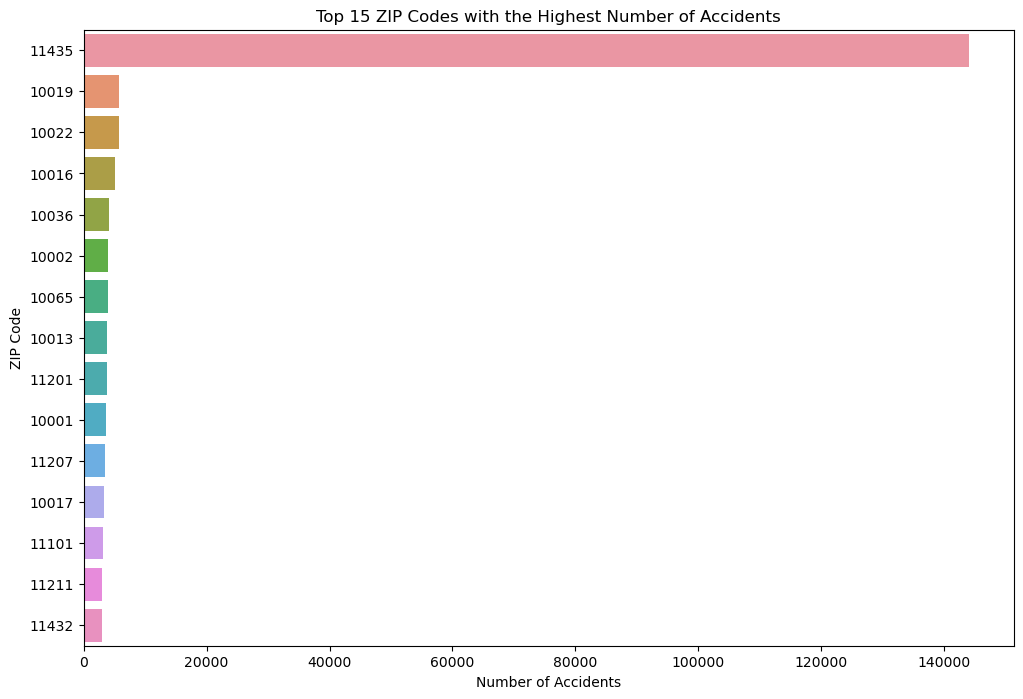

In [26]:
# Group by ZIP CODE and count occurrences, then sort
zip_code_accidents = new_pds.groupby("ZIP CODE").size().reset_index(name="count").sort_values(by="count", ascending=False)

# Display the top 15 ZIP Codes
print(zip_code_accidents.head(15))

# Horizontal bar plot for the top 15 ZIP Codes
plt.figure(figsize=(12, 8))
sns.barplot(y="ZIP CODE", x="count", data=zip_code_accidents.head(15))
plt.ylabel("ZIP Code")
plt.xlabel("Number of Accidents")
plt.title("Top 15 ZIP Codes with the Highest Number of Accidents")
plt.show()

                        ON STREET NAME  count
3007  CHRISTOPHER LANE                  79766
2591  BROADWAY                           4113
844   3 AVENUE                           3273
1775  ATLANTIC AVENUE                    2952
599   2 AVENUE                           2831
2333  BELT PARKWAY                       2688
7038  NORTHERN BOULEVARD                 2167
2641  BROOKLYN QUEENS EXPRESSWAY         2154
4628  FDR DRIVE                          2081
6196  LONG ISLAND EXPRESSWAY             1898
7573  QUEENS BOULEVARD                   1885
5076  GRAND CENTRAL PKWY                 1853
4     1 AVENUE                           1845
1070  5 AVENUE                           1732
4702  FLATBUSH AVENUE                    1666


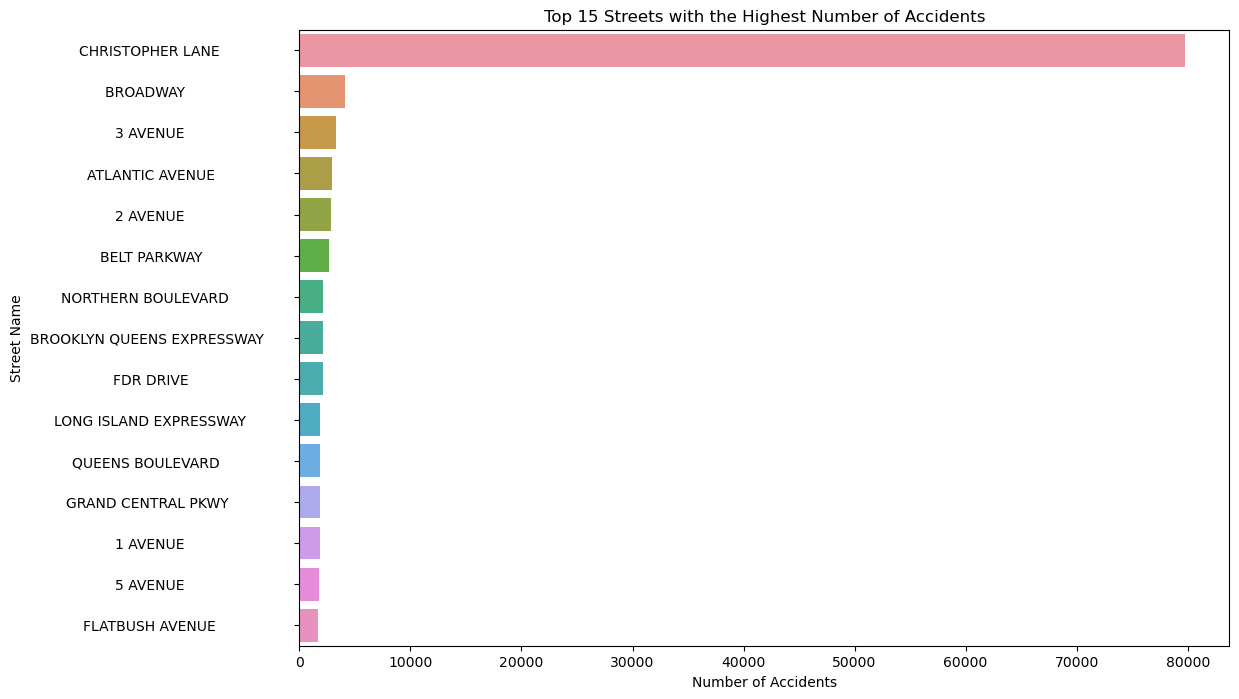

In [27]:
# Group by ON STREET NAME and count occurrences, then sort
street_accidents = new_pds.groupby("ON STREET NAME").size().reset_index(name="count").sort_values(by="count", ascending=False)

# Display the top 15 streets
print(street_accidents.head(15))

# Horizontal bar plot for the top 15 streets
plt.figure(figsize=(12, 8))
sns.barplot(y="ON STREET NAME", x="count", data=street_accidents.head(15))
plt.ylabel("Street Name")
plt.xlabel("Number of Accidents")
plt.title("Top 15 Streets with the Highest Number of Accidents")
plt.show()

"West 90 Street" has the highest collision count, suggesting it's a major location for accidents. Additionally, "Broadway" and "3rd Avenue" also show significant collision numbers, indicating frequent traffic incidents in these areas.

C:\Users\jathi\AppData\Local\Temp\ipykernel_16284\2306062284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pds["total_injured_killed"] = new_pds["NUMBER OF PERSONS INJURED"] + new_pds["NUMBER OF PERSONS KILLED"]


                        CONTRIBUTING FACTOR VEHICLE 1  \
11                     Driver Inattention/Distraction   
18                      Failure to Yield Right-of-Way   
32                                    Other Vehicular   
52                        Traffic Control Disregarded   
55                                       Unsafe Speed   
21                              Following Too Closely   
6                                    Backing Unsafely   
40  Pedestrian/Bicyclist/Other Pedestrian Error/Co...   
44                     Reaction to Uninvolved Vehicle   
12                                Driver Inexperience   
39                                  Pavement Slippery   
58                            View Obstructed/Limited   
37                     Passing or Lane Usage Improper   
53                                 Turning Improperly   
19                                    Fatigued/Drowsy   

    sum(total_injured_killed)  
11                    64364.0  
18                    2

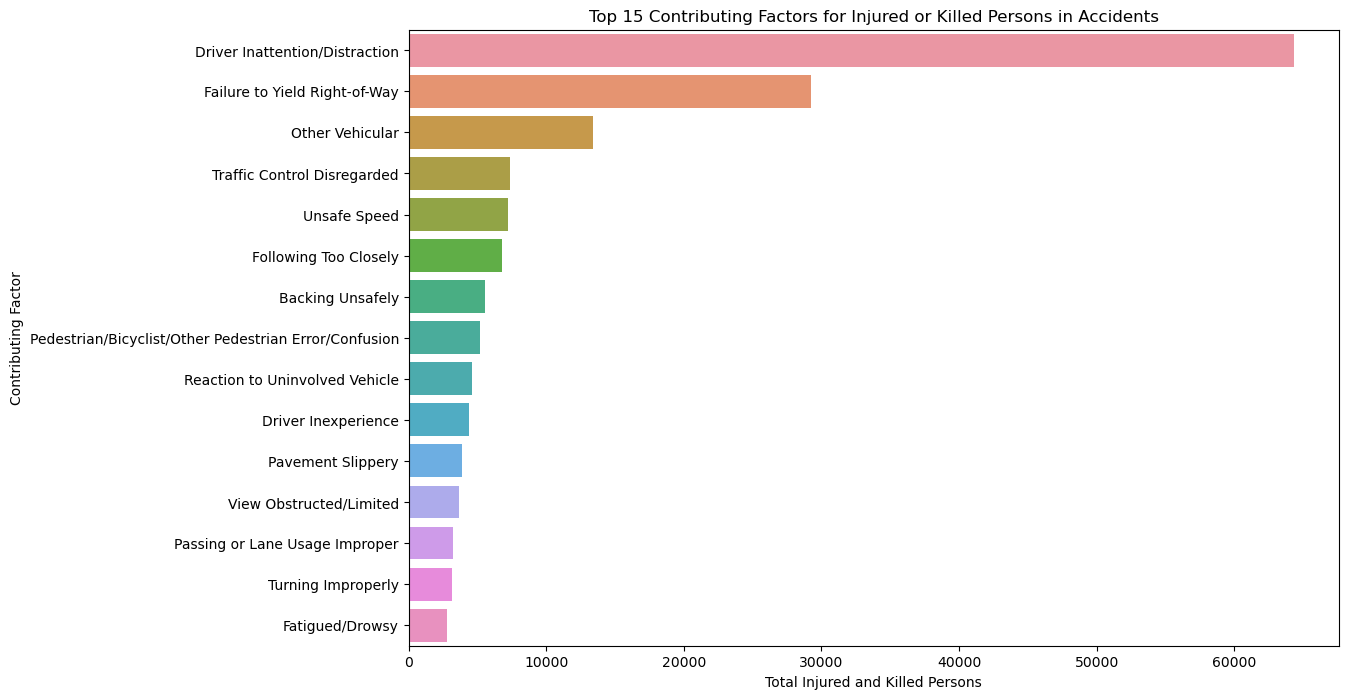

In [29]:
# Calculate total injured or killed persons
new_pds["total_injured_killed"] = new_pds["NUMBER OF PERSONS INJURED"] + new_pds["NUMBER OF PERSONS KILLED"]

# Group by CONTRIBUTING FACTOR VEHICLE 1 and sum total injured or killed persons, then sort
factors_injuries = new_pds.groupby("CONTRIBUTING FACTOR VEHICLE 1")["total_injured_killed"].sum().reset_index(name="sum(total_injured_killed)").sort_values(by="sum(total_injured_killed)", ascending=False)

# Display the top 15 contributing factors
print(factors_injuries.head(15))

# Horizontal bar plot for the top 15 contributing factors
plt.figure(figsize=(12, 8))
sns.barplot(y="CONTRIBUTING FACTOR VEHICLE 1", x="sum(total_injured_killed)", data=factors_injuries.head(15))
plt.ylabel("Contributing Factor")
plt.xlabel("Total Injured and Killed Persons")
plt.title("Top 15 Contributing Factors for Injured or Killed Persons in Accidents")
plt.show()

Driver inattention/distraction and failure to yield right-of-way are the primary causes of collisions resulting in injury or death, according to the data. Additionally, traffic control violations and unsafe speed are significant contributing factors. This highlights the crucial impact of driver behavior on road safety.


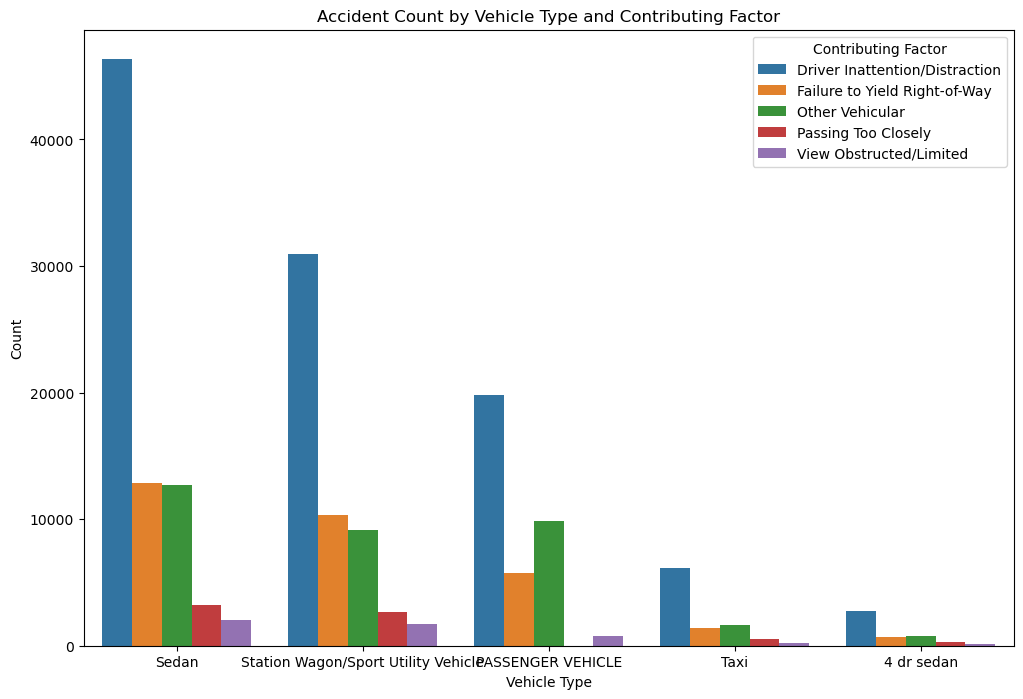

In [31]:
# Group by VEHICLE TYPE CODE 1 and CONTRIBUTING FACTOR VEHICLE 1, then count occurrences and sort
vehicle_factors = new_pds.groupby(["VEHICLE TYPE CODE 1", "CONTRIBUTING FACTOR VEHICLE 1"]).size().reset_index(name="count").sort_values(by="count", ascending=False)

# Convert the vehicle_factors DataFrame to Pandas
vehicle_factors_pd = vehicle_factors

# Filter the data to show only the top vehicle types and contributing factors
top_vehicle_types = vehicle_factors_pd["VEHICLE TYPE CODE 1"].value_counts().head(5).index.tolist()
top_factors = vehicle_factors_pd["CONTRIBUTING FACTOR VEHICLE 1"].value_counts().head(5).index.tolist()
filtered_data = vehicle_factors_pd[vehicle_factors_pd["VEHICLE TYPE CODE 1"].isin(top_vehicle_types) & vehicle_factors_pd["CONTRIBUTING FACTOR VEHICLE 1"].isin(top_factors)]

plt.figure(figsize=(12, 8))
sns.barplot(x="VEHICLE TYPE CODE 1", y="count", hue="CONTRIBUTING FACTOR VEHICLE 1", data=filtered_data)
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Accident Count by Vehicle Type and Contributing Factor')
plt.legend(title='Contributing Factor', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\jathi\AppData\Local\Temp\ipykernel_16284\3513706013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pds['factor_combination'] = new_pds['CONTRIBUTING FACTOR VEHICLE 1'] + " + " + new_pds['CONTRIBUTING FACTOR VEHICLE 2']


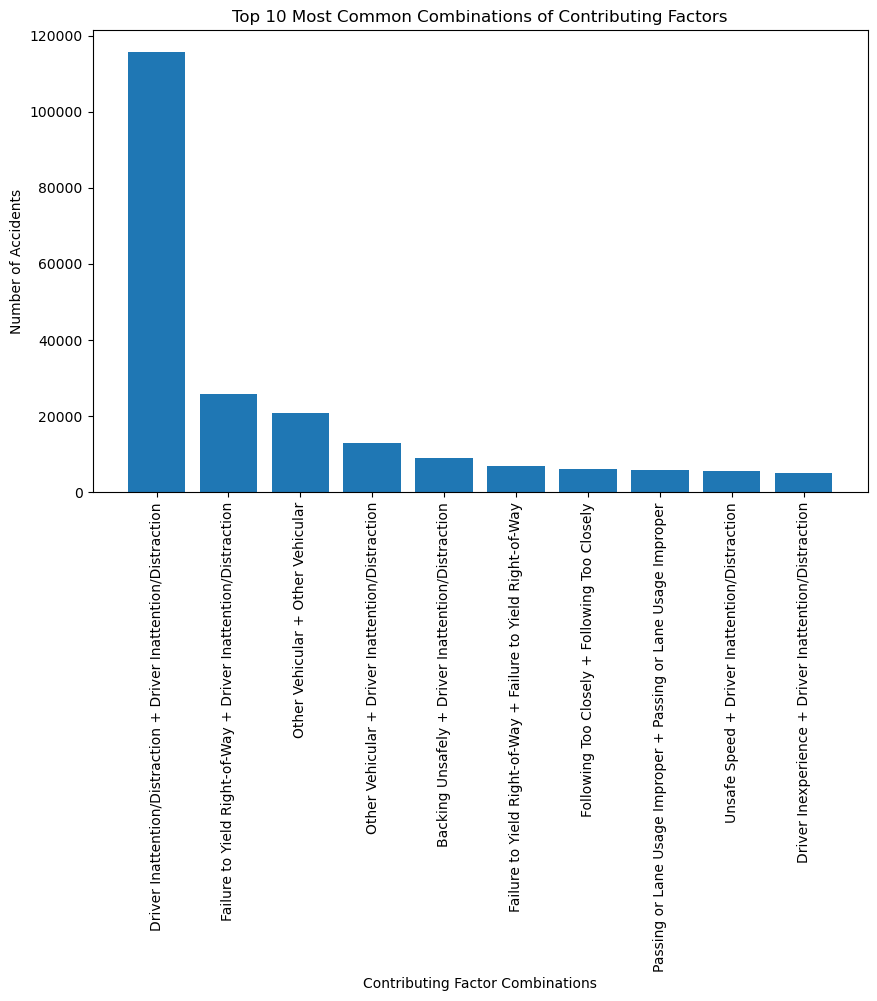

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the contributing factors from both columns into one
new_pds['factor_combination'] = new_pds['CONTRIBUTING FACTOR VEHICLE 1'] + " + " + new_pds['CONTRIBUTING FACTOR VEHICLE 2']

# Group by the concatenated factor combination and count occurrences
combinations_count = new_pds['factor_combination'].value_counts().reset_index()
combinations_count.columns = ['factor_combination', 'count']
combinations_count = combinations_count.sort_values(by='count', ascending=False)

# Select the top 10 combinations
top_combinations = combinations_count.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_combinations["factor_combination"], top_combinations["count"])
plt.xticks(rotation=90)
plt.title("Top 10 Most Common Combinations of Contributing Factors")
plt.xlabel("Contributing Factor Combinations")
plt.ylabel("Number of Accidents")
plt.show()


In [33]:
sample['CRASH DATE'] = sample['CRASH DATE'].astype('datetime64[ns]')
sample['CRASH TIME'] = sample['CRASH TIME'].astype('datetime64[ns]')
sample['BOROUGH'] = sample['BOROUGH'].astype('str')
#sample['ZIP CODE'] = sample['ZIP CODE'].astype('int')
sample['ON STREET NAME'] = sample['ON STREET NAME'].astype('str')
sample['CROSS STREET NAME'] = sample['CROSS STREET NAME'].astype('str')
sample['CONTRIBUTING FACTOR VEHICLE 1'] = sample['CONTRIBUTING FACTOR VEHICLE 1'].astype('str')
sample['CONTRIBUTING FACTOR VEHICLE 2'] = sample['CONTRIBUTING FACTOR VEHICLE 2'].astype('str')
sample['VEHICLE TYPE CODE 1'] = sample['VEHICLE TYPE CODE 1'].astype('str')
sample['VEHICLE TYPE CODE 2'] = sample['VEHICLE TYPE CODE 2'].astype('str')
# Filling null values with 0 and then converting the datatype
sample['NUMBER OF PERSONS KILLED'] = sample['NUMBER OF PERSONS KILLED'].fillna(0)
sample['NUMBER OF PERSONS INJURED'] = sample['NUMBER OF PERSONS INJURED'].fillna(0)

sample['NUMBER OF PERSONS KILLED'] = sample['NUMBER OF PERSONS KILLED'].astype('int')
sample['NUMBER OF PERSONS INJURED'] = sample['NUMBER OF PERSONS INJURED'].astype('int')

print("Datatype conversion completed!")


Datatype conversion completed!


In [34]:
# Create new DataFrame
new_collision_data = pd.DataFrame()

# Assign columns to the new DataFrame
new_collision_data['BOROUGH'] = sample['BOROUGH']
new_collision_data['NUMBER OF PERSONS KILLED'] = sample['NUMBER OF PERSONS KILLED']
new_collision_data['NUMBER OF PERSONS INJURED'] = sample['NUMBER OF PERSONS INJURED']
new_collision_data['NUMBER OF PEDESTRIANS INJURED'] = sample['NUMBER OF PEDESTRIANS INJURED']
new_collision_data['NUMBER OF PEDESTRIANS KILLED'] = sample['NUMBER OF PEDESTRIANS KILLED']
new_collision_data['NUMBER OF CYCLIST INJURED'] = sample['NUMBER OF CYCLIST INJURED']
new_collision_data['NUMBER OF CYCLIST KILLED'] = sample['NUMBER OF CYCLIST KILLED']
new_collision_data['NUMBER OF MOTORIST INJURED'] = sample['NUMBER OF MOTORIST INJURED']
new_collision_data['NUMBER OF MOTORIST KILLED'] = sample['NUMBER OF MOTORIST KILLED']
new_collision_data['CONTRIBUTING FACTOR VEHICLE 1'] = sample['CONTRIBUTING FACTOR VEHICLE 1']
new_collision_data['VEHICLE TYPE CODE 1'] = sample['VEHICLE TYPE CODE 1']
new_collision_data['COLLISION_ID'] = sample['COLLISION_ID']

print("DataFrame created successfully!")

DataFrame created successfully!


In [35]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming new_collision_data contains your dataset

# Encode categorical variables if any
new_collision_data_encoded = new_collision_data.apply(LabelEncoder().fit_transform)

# Define target variable and features
target = 'NUMBER OF PERSONS KILLED'
features = new_collision_data_encoded.drop(columns=[target])

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=7)  # Select top 7 features


In [36]:
X_selected = selector.fit_transform(features, new_collision_data_encoded[target])
# Get selected feature names
selected_feature_names = features.columns[selector.get_support(indices=True)].tolist()

# Add target variable to selected features
selected_feature_names.append(target)

# Create final dataset with selected features
final_data = new_collision_data_encoded[selected_feature_names]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=[target]), 
                                                    final_data[target], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Accuracy of Linear Regressor model on training set:", train_r2)
print("Accuracy of Linear Regressor model on test set:", test_r2)

# Model Evaluation
print("Model Evaluation of Linear Regression.")
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_test_pred), 1))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_test_pred), 1))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 1))
print('R-Squared value:', round(test_r2, 2))

Accuracy of Linear Regressor model on training set: 0.9805319441212507
Accuracy of Linear Regressor model on test set: 0.9789127875842067
Model Evaluation of Linear Regression.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.98


The linear regression model performs well on both training and test sets, demonstrating high accuracy in predicting the target variable. Evaluation metrics such as mean absolute error, mean squared error, and root mean squared error are all minimal, indicating precise predictions. With a high R-squared value of 0.98, the model effectively explains variance in the data. In summary, the model proves to be a dependable predictor for the task at hand.

In [39]:
selected_feature_names

['NUMBER OF PERSONS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'COLLISION_ID',
 'NUMBER OF PERSONS KILLED']

In [40]:
# Train a Decision Tree regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Accuracy of Decision Tree Regressor model on training set:", train_r2)
print("Accuracy of Decision Tree Regressor model on test set:", test_r2)

# Model Evaluation
print("Model Evaluation of Decision Tree Regression.")
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_test_pred), 1))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_test_pred), 1))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 1))
print('R-Squared value:', round(test_r2, 2))

Accuracy of Decision Tree Regressor model on training set: 1.0
Accuracy of Decision Tree Regressor model on test set: 0.9550606763540346
Model Evaluation of Decision Tree Regression.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.96


The Decision Tree Regressor model demonstrates excellent predictive performance, with perfect accuracy on the training set and high accuracy on the test set. Evaluation metrics such as mean absolute error, mean squared error, and root mean squared error are all low, indicating accurate predictions. With a high R-squared value of 0.96, the model effectively captures the variance in the data. In summary, the Decision Tree Regressor model is highly effective for the given task.

In [42]:
#Train a Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Accuracy of Random Forest Regressor model on training set:", train_r2)
print("Accuracy of Random Forest Regressor model on test set:", test_r2)

# Model Evaluation
print("Model Evaluation of Random Forest Regression.")
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_test_pred), 1))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_test_pred), 1))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 1))
print('R-Squared value:', round(test_r2, 2))

Accuracy of Random Forest Regressor model on training set: 0.9963232294449116
Accuracy of Random Forest Regressor model on test set: 0.9569868881138097
Model Evaluation of Random Forest Regression.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.96


The Random Forest Regressor model demonstrates strong predictive performance, with high accuracy on both training and test sets. Minimal values for evaluation metrics like mean absolute error, mean squared error, and root mean squared error suggest accurate predictions. Additionally, the high R-squared value of 0.96 indicates that the model effectively captures the variance in the data. In summary, the Random Forest Regressor model is highly effective for the given task.

References:
https://www.linkedin.com/pulse/motor-vehicle-collision-data-analysis-new-york-city-zuberi/

https://github.com/ShrivatsAgrawal/Predictive-Analytics---NYC-Motor-Collisions/blob/main/Jupyter%20Notebooks/Modeling.ipynb